Eduardo Jones

Python code using NumPy, Matplotlib, and Keras to perform image classification for the Fashion_MINIST datset (https://github.com/zalandoresearch/fashion-mnist)

Loading the dataset using tf.keras.datasets.fashion_mnist.load_data() and showing the first 12 images of the training dataset in two rows using .imshow() in Matplotlib.

*  https://www.tensorflow.org/api_docs/python/tf/keras/datasets/fashion_mnist/load_data

* https://www.geeksforgeeks.org/how-to-display-multiple-images-in-one-figure-correctly-in-matplotlib/

In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.utils import to_categorical


(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

train_images.shape
len(train_labels)
test_images.shape
len(test_labels)
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

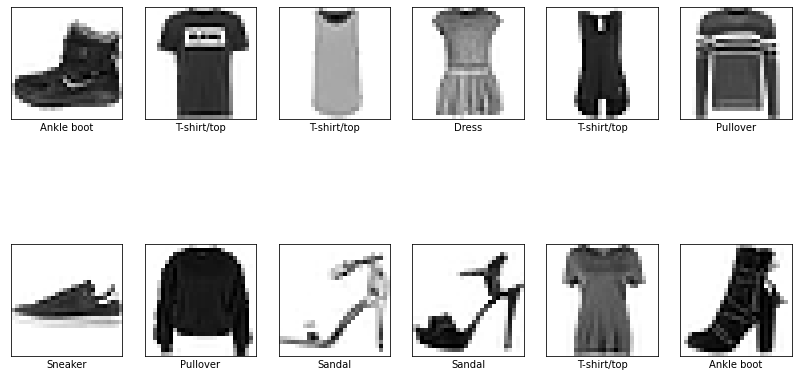

In [ ]:
import cv2
from matplotlib import pyplot as plt

plt.figure(figsize=(14,8))
for i in range(12):
  plt.subplot(2,6,i+1)
  plt.xticks([])
  plt.yticks([])




import cv2
from matplotlib import pyplot as plt

plt.figure(figsize=(14,))
for i in range(12):
  plt.subplot(2,6)

In [ ]:
plt.figure(figsize=(14,8))
for i in range(12):
    plt.subplot(2,6,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

Adding the “depth” dimension to the training/testing image data using .reshape(), use to_categorical() to transform all labels into their one-hot encoding forms, and normalize the pixel values of all images into [0, 1].




In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

Building a CNN model using a stack of Conv2D (128 filters of size (3, 3) with ReLU activation), MaxPooling2D (pool size of (2, 2)), Conv2D (64 filters of size (3, 3 with ReLU activation), MaxPooling2D (pool size of (2, 2)), Dense (128 hidden units with ReLU activation), and output layer. Display the model architecture using .summary().

specifying parameters of the input layer and output layer.

In [ ]:
from keras import layers
from keras import models
model = models.Sequential()
model.add(layers.Conv2D(128, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 26, 26, 128)       1280      
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 13, 13, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_15 (Conv2D)          (None, 11, 11, 64)        73792     
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                            
                                                                 
Total params: 75,072
Trainable params: 75,072
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

Compiled and trained the model for 10 epochs and batch size of 32. Set verbose = 0 during the training to compress the training progress.




In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=10, batch_size=32, verbose = 0)

In [ ]:
model.summary()
train_loss, train_acc = model.evaluate(train_images, train_labels)

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 26, 26, 128)       1280      
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 13, 13, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_15 (Conv2D)          (None, 11, 11, 64)        73792     
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                            
                                                                 
 flatten_10 (Flatten)        (None, 1600)              0         
                                                                 
 dense_21 (Dense)            (None, 128)              

In [ ]:
train_images.shape
train_labels.shape

(60000, 10)

Testing the trained model on the testing dataset and observing the loss and accuracy using .evaluate().

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.3048 - accuracy: 0.9016


using NumPy, Matploblib and Keras to perform image classification using pre-trained model for the CIFAR-10 dataset (https://www.cs.toronto.edu/~kriz/cifar.html).

Loading the dataset using tf.keras.datasets.cifar10.load_data() and showing the first 20 images of the training dataset in two rows.

* https://www.tensorflow.org/api_docs/python/tf/keras/datasets/cifar10/load_data

* obtaining the pair of feature matrix and label vector for the training dataset and the pair of  feature matrix and label vector for the testing dataset at the end of this step

* The CIFAR-10 dataset consists of 60000 32x32 color images in 10 classes, each with a label value within [0, 9]. In the following step, we want to partition this dataset into two training/testing pairs

In [ ]:
from __future__ import print_function

import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.datasets import mnist,cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import backend as K
from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt
import random

(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

train_images.shape
len(train_labels)
test_images.shape
len(test_labels)
test_labels

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

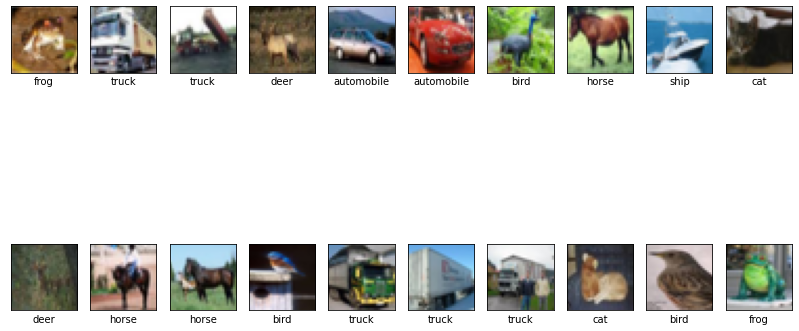

In [ ]:
plt.figure(figsize=(14,8))
for i in range(20):
    plt.subplot(2,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

Reshaping the label vectors in both the training and testing datasets to 1D using .reshape(), and compare them with 5 to find out the indices of images that have class labels < 5 and class labels >= 5, respectively, in the training and testing datasets.

four index arrays of Boolean values at the end of this step (<5 and >= 5 for training dataset and <5 and >=5 for testing dataset)


In [ ]:
train_lessthan_5 = train_labels.reshape(-1) < 5
test_lessthan_5 = test_labels.reshape(-1) < 5
train_morethan_5 = train_labels.reshape(-1) >= 5
test_morethan_5 = test_labels.reshape(-1) >= 5

In [ ]:
train_images_less_5 = train_images[train_lessthan_5]
train_labels_less_5 = train_labels[train_lessthan_5]
test_images_less_5 = test_images[test_lessthan_5]
test_labels_less_5 = test_labels[test_lessthan_5]

In [ ]:
train_images_more_5 = train_images[train_morethan_5]
train_labels_more_5 = train_labels[train_morethan_5]
test_images_more_5 = test_images[test_morethan_5]
test_labels_more_5 = test_labels[test_morethan_5]

In [ ]:
print("X Train < 5", train_images_less_5.shape)
print("Y Train < 5", train_labels_less_5.shape)
print("X Test < 5", test_images_less_5.shape)
print("Y Test < 5", test_labels_less_5.shape)
print("X Train >= 5", train_images_more_5.shape)
print("Y Train >= 5", train_labels_more_5.shape)
print("X Test >= 5", test_images_more_5.shape)
print("Y Test >= 5", test_labels_more_5.shape)

X Train < 5 (25000, 32, 32, 3)
Y Train < 5 (25000, 1)
X Test < 5 (5000, 32, 32, 3)
Y Test < 5 (5000, 1)
X Train >= 5 (25000, 32, 32, 3)
Y Train >= 5 (25000, 1)
X Test >= 5 (5000, 32, 32, 3)
Y Test >= 5 (5000, 1)


Using the index arrays obtained in the previous step to split the training/testing dataset into two subsets (each consisting of a feature matrix and a label vector): one with class labels < 5 and one with class labels >= 5.

obtaining four subsets at the end of this step: one pair of training and testing subsets of images with class labels < 5 and another pair of training and testing subsets of images with class labels >= 5.

Subtracting 5 from the label vectors of the pair of training and testing subsets with class labels >= 5 so that the label vectors in this pair of subsets contains values from 0 to 4.

Using to_categorical() to transform all labels into their one-hot encoding forms, and normalize the pixel values of all images into [0, 1].

In [ ]:
train_images_less_5 = train_images_less_5.astype('float32') / 255
test_images_less_5  = test_images_less_5.astype('float32') / 255
train_images_more_5  = train_images_more_5.astype('float32') / 255
test_images_more_5   = test_images_more_5.astype('float32') / 255

train_labels_less_5 = to_categorical(train_labels_less_5)
test_labels_less_5 = to_categorical(test_labels_less_5)
train_labels_more_5 = to_categorical(train_labels_more_5)
test_labels_more_5 = to_categorical(test_labels_more_5)

Building a CNN model_1 using a stack of Conv2D (64 filters of size (3, 3) with ReLU activation), Conv2D (64 filters of size (3, 3) with ReLU activation), MaxPooling2D (pool size of (2, 2)), Dense (128 hidden units with ReLU activation), and output layer. Display the model architecture using .summary().

In [ ]:
from keras import layers
from keras import models
model_1 = models.Sequential()
model_1.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model_1.add(layers.MaxPooling2D((2, 2)))
model_1.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_1.add(layers.MaxPooling2D((2, 2)))
model_1.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 30, 30, 64)        1792      
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 15, 15, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 13, 13, 64)        36928     
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 6, 6, 64)         0         
 g2D)                                                            
                                                                 
Total params: 38,720
Trainable params: 38,720
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_1.add(layers.Flatten())
model_1.add(layers.Dense(128, activation='relu'))
model_1.add(layers.Dense(5, activation='softmax'))
model_1.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 30, 30, 64)        1792      
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 15, 15, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 13, 13, 64)        36928     
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 6, 6, 64)         0         
 g2D)                                                            
                                                                 
 flatten_11 (Flatten)        (None, 2304)              0         
                                                                 
 dense_23 (Dense)            (None, 128)              

In [ ]:
train_labels_less_5.shape

(25000, 5)

Compiled and trained the model on the subset of training images with class labels < 5 for 20 epochs and batch size of 128. Set verbose = 0 during the training to compress the results. Draw the plot of the training accuracy w.r.t. the epoch number.

In [ ]:
model_1.compile(loss='binary_crossentropy',
                optimizer='rmsprop',
                metrics=['accuracy'])
model_1.fit(train_images_less_5, train_labels_less_5, epochs=20, batch_size=128, verbose = 0)

Testing trained model_1 on the subset of testing images with class labels <5  and observe the loss and accuracy using .evaluate().

In [ ]:
test_loss, test_acc = model_1.evaluate(test_images_less_5, test_labels_less_5)

157/157 [==============================] - 1s 3ms/step - loss: 0.5585 - accuracy: 0.8034


Building a new CNN model_2 that has the same architecture as model_1
and reuse the pre-trained convolutional base layers of model_1 (i.e., all layers before applying flatten()). You need to freeze the pre-trained convolutional base layers of model_2 so that their model parameters will not be changed during the training. Displaying the model architecture of model_2 using .summary().

In [ ]:
model_2 = models.Sequential()
model_2.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model_2.add(layers.MaxPooling2D((2, 2)))
model_2.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_2.add(layers.MaxPooling2D((2, 2)))
model_2.add(layers.Flatten())
model_2.add(layers.Dense(128, activation='relu'))
model_2.add(layers.Dense(10, activation='softmax'))
model_2.summary()

for layer in model_2.layers[:-2]:
    layer.trainable = False

model_2.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 30, 30, 64)        1792      
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 15, 15, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 13, 13, 64)        36928     
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 6, 6, 64)         0         
 g2D)                                                            
                                                                 
 flatten_12 (Flatten)        (None, 2304)              0         
                                                                 
 dense_25 (Dense)            (None, 128)              

Compiled model_2, and train it on the subset of training images with class labels >=5 for 20 epochs and batch size of 128

In [ ]:
model_2.compile(loss='binary_crossentropy',
                optimizer='rmsprop',
                metrics=['accuracy'])
model_2.fit(train_images_more_5, train_labels_more_5, epochs=20, batch_size=128, verbose = 0)

Testing trained model_2 on the subset of testing images with class labels >=5  and observe the loss and accuracy using .evaluate().

In [ ]:
test_loss, test_acc = model_2.evaluate(test_images_more_5, test_labels_more_5)

157/157 [==============================] - 1s 3ms/step - loss: 0.1097 - accuracy: 0.7822
